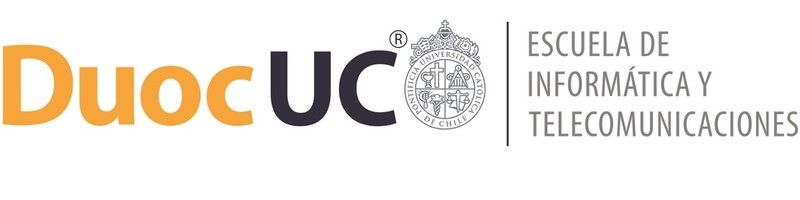

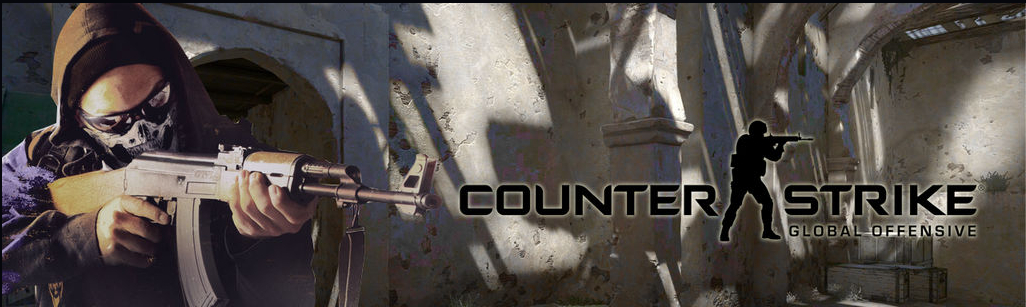

# Informe Técnico - Examen Transversal: Caso Counter Strike

- Profesor: Felipe Zambrano

### Instrucciones generales

- Los grupos son los mismos de la Evaluación Parcial 4.
- Esta prohibido compartir las respuestas con otros grupos.
- Indicios de copia serán penalizados con la nota mínima.
- Cualquier duda fuera del horario de clases se debe enviar por el AVA. Mensajes al docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente, si utiliza material extra debe citarlo.

### Sobre la entrega
  * Antes de comenzar a realizar la evaluación, guarde una copia de este cuadernillo en su Google Drive (`Archivo > Guardar una copia en Drive`). No hacer esto puede implicar que su trabajo no se guarde correctamente.
  *  Debe descargar este cuardenillo de Google Colab como un archivo `.ipynb` (`Archivo > Descargar > Descargar .ipynb`). No se revisarán otros formatos de entrega. Recuerde guardar su desarrollo antes de descargar el archivo correspondiente.
  *  El archivo debe ser reproducible, o sea si cargo el archivo en Google Colab y ejecuto todas las celdas, debe reproducir los resultados que usted obtuvo.
  *  Se debe subir el archivo `.ipynb` descargado al AVA en el apartado Examen Transversal: Entrega ET.
  *  La fecha límite de entrega es el **lunes 1 de julio hasta las 12:59 hrs**. Por cada hora de retraso, se descontará un punto de la nota final. Ejemplo: Si entrega entre 00:00 y 00:59, la nota máxima será 6.0. Si entrega entre 01:00 y 01:59, la nota máxima será 5.0, etc.
  *  Ante cualquier sospecha de copia, reprobarán automáticamente el curso con nota mínima (1.0) los involucrados. La discusión entre pares siempre es beneficiosa y fomenta diálogos interesantes, pero cada uno debe desarrollar su propio trabajo.
  * El cálculo de la nota de la evaluación esta dado por: $\text{Nota}=1+{\sum_{i=1}^7\text{PuntajePregunta}_i \over 7}$


### Grupo Nº1

### Integrantes del grupo

- Eitan Besa
- Claudio Durán
- Raul Llanos
- Victor Muñoz

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

### Cargar el dataset


En esta sección, cargaremos el dataset desde el repositorio de la asignatura. Para ello ejecute las siguientes líneas:


In [ ]:
# Importe las librerías que estime necesario
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
url = 'https://raw.githubusercontent.com/fzambran/Fundamentos-ML/main/Dataset-E2/01%20demo_round_traces.csv'
df_counter1 = pd.read_csv(url, sep = ';')

<ipython-input-2-3c6d3f864f58>:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_counter1 = pd.read_csv(url, sep = ';')


In [ ]:
df_counter=df_counter1.drop(['Unnamed: 0'],axis=1)

In [ ]:
df_counter1.sample(10)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
6816,9647,de_inferno,Terrorist,2,40,29,True,True,False,False,...,1,0,0,0,4700,23600,20,7,2,11
3142,4623,de_inferno,Terrorist,1,21,7,True,True,False,False,...,0,0,0,0,200,2000,6,0,0,3
70884,113377,de_nuke,Terrorist,2,468,19,True,True,True,False,...,1,0,0,0,600,2700,16,2,2,4
50448,77340,de_dust2,CounterTerrorist,1,319,20,True,False,False,False,...,0,0,0,0,200,1100,22,3,6,9
14026,21117,de_dust2,CounterTerrorist,2,88,15,False,False,True,False,...,0,0,0,0,5700,32600,6,0,2,2
8793,13024,de_mirage,Terrorist,1,55,7,False,False,False,False,...,0,0,0,0,6850,25400,7,0,0,1
60816,94048,de_inferno,Terrorist,2,387,19,True,True,False,False,...,0,0,0,0,2200,19000,9,2,1,5
77603,121926,de_dust2,CounterTerrorist,2,504,1,False,True,False,False,...,0,0,0,0,200,1500,0,0,0,0
67826,108949,de_mirage,CounterTerrorist,2,449,1,True,False,True,False,...,1,0,0,0,200,3700,1,0,0,0
69513,111156,de_inferno,CounterTerrorist,2,458,9,False,False,False,False,...,2,0,0,1,4750,19650,11,2,1,7


In [ ]:
df_counter1.shape

(79157, 30)

## Fase 1: Business Understanding **[6 pts]**

Según nuestro conocimiento y lo que llegamos a ver en torneos oficiales de CS GO la mejor arma y mas utilizada a nivel mundial es el rifle de asalto por lo cual según esto es que desarrollaremos los graficos a continuación.

In [ ]:
df_counter1.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


## Fase 2: Data Understanding **[6 pts]**

In [ ]:
df_counter.info()
#Debido a que TimeAlive, TravelledDistance y FirstKillTime deberian ser int por ser tiempo se hace la siguiente conversion

# Función para eliminar puntos y convertir a número
def convert_to_number(value):
    return pd.to_numeric(value.replace('.', ''), errors='coerce')

# Columnas que necesitan conversión (puedes ajustar según sea necesario)
columns_to_convert = ['TimeAlive', 'TravelledDistance', 'FirstKillTime']

# Aplicar la conversión a cada columna
for column in columns_to_convert:
    df_counter[column] = df_counter[column].apply(convert_to_number)

# Verificar si las conversiones fueron exitosas.
print(df_counter[columns_to_convert].dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79155 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  object 
 6   MatchWinner                  79156 non-null  object 
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   TimeAlive                    79157 non-null  object 
 10  TravelledDistance            79157 non-null  object 
 11  RLethalGrenadesThrown        79157 non-null  int64  
 12  RNonLethalGrenadesThrown     79157 non-null  int64  
 13  PrimaryAssaultRi

In [ ]:
# Identificando las columnas no númericas
non_numeric_columns = df_counter.select_dtypes(exclude=['int64', 'float64']).columns
print("Columnas no numéricas:")
print(non_numeric_columns)

Columnas no numéricas:
Index(['Map', 'Team', 'RoundWinner', 'MatchWinner', 'Survived',
       'AbnormalMatch'],
      dtype='object')


In [ ]:
# Crear una lista de columnas numéricas
numeric_columns = df_counter.columns.difference(non_numeric_columns)

# Crear un nuevo DataFrame solo con las columnas numéricas
df_numeric = df_counter[numeric_columns]

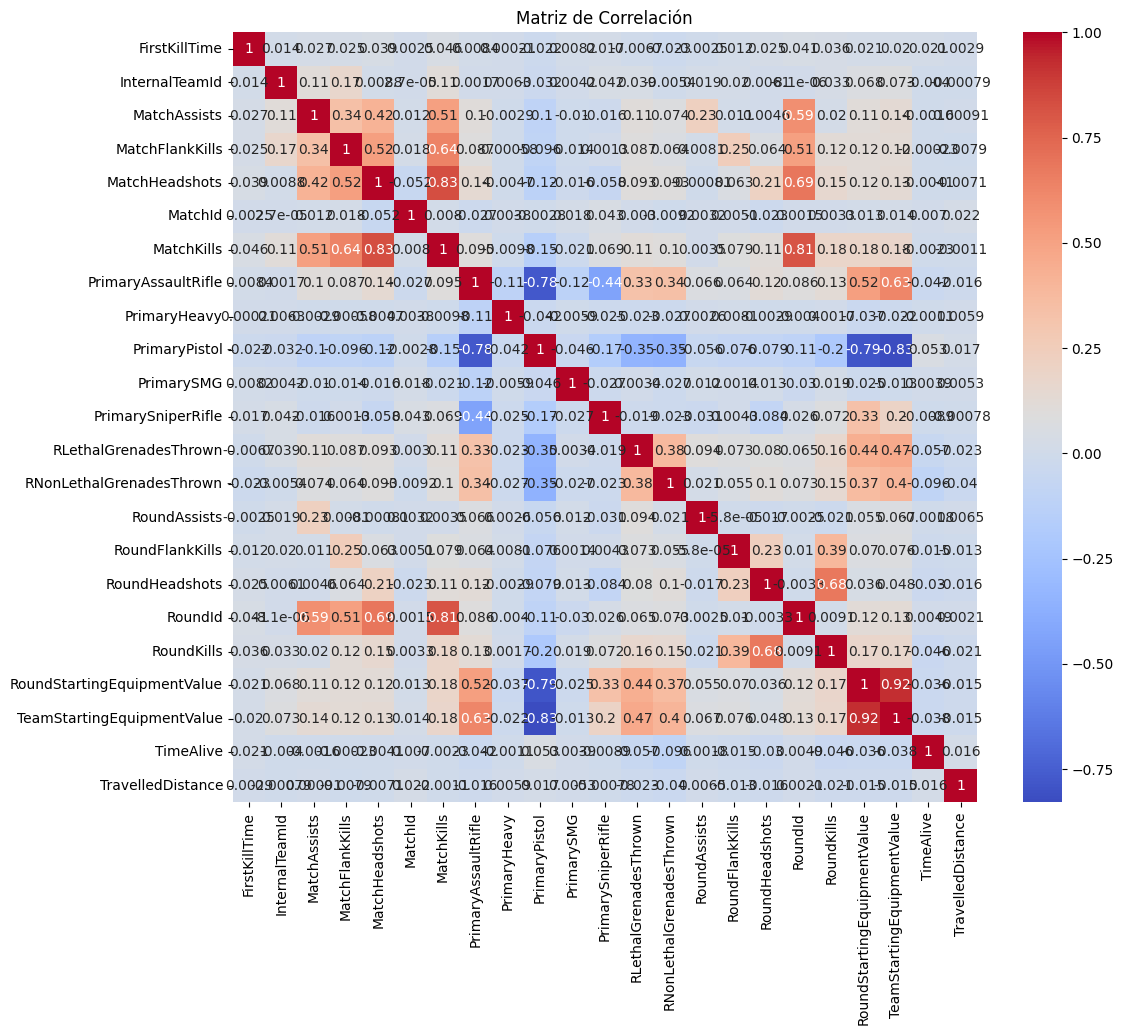

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

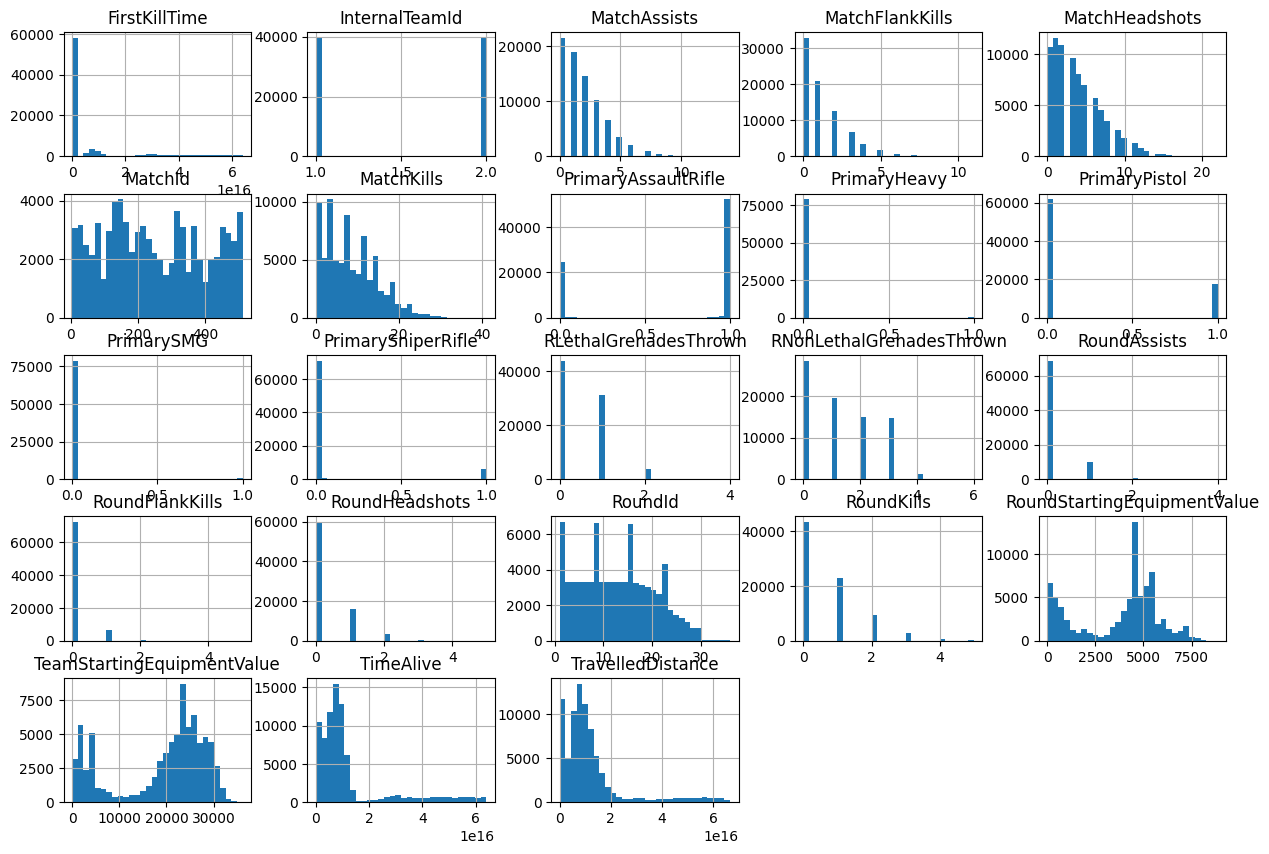

In [ ]:
# Mostrar histogramas de las variables numéricas
df_numeric.hist(bins=30, figsize=(15, 10))
plt.show()

         RoundKills    MatchKills  PrimaryAssaultRifle  PrimarySniperRifle  \
count  79157.000000  79157.000000         79157.000000        79157.000000   
mean       0.671349      8.511578             0.675363            0.089840   
std        0.881798      6.195079             0.464125            0.279797   
min        0.000000      0.000000             0.000000            0.000000   
25%        0.000000      3.000000             0.000000            0.000000   
50%        0.000000      8.000000             1.000000            0.000000   
75%        1.000000     13.000000             1.000000            0.000000   
max        5.000000     41.000000             1.000000            1.000000   

       PrimaryHeavy    PrimarySMG  PrimaryPistol  
count  79157.000000  79157.000000   79157.000000  
mean       0.005964      0.007046       0.221787  
std        0.075497      0.082453       0.415451  
min        0.000000      0.000000       0.000000  
25%        0.000000      0.000000       0.

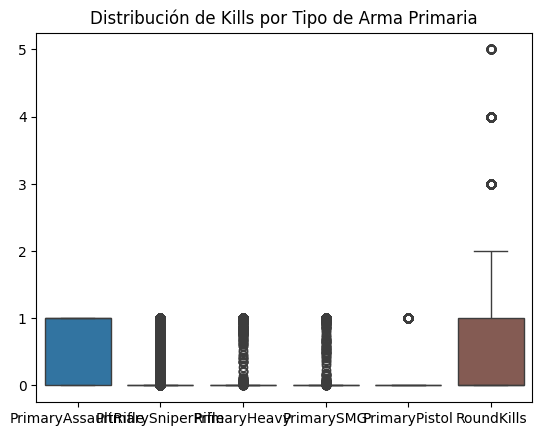

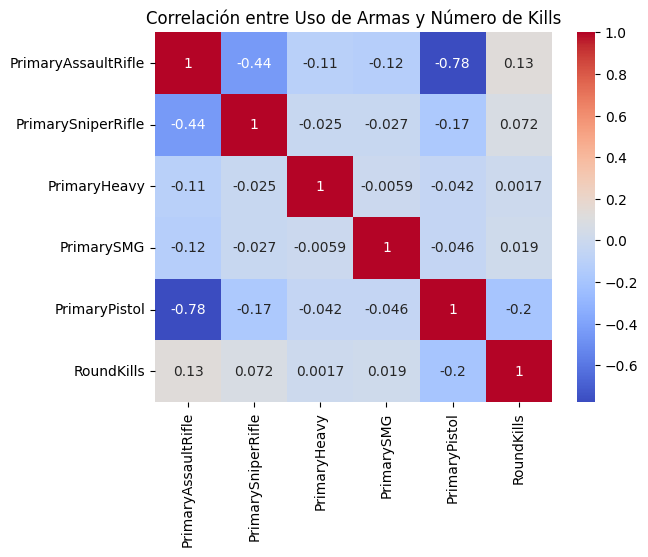

In [ ]:
# Estadísticas descriptivas de las variables relevantes
print(df_counter[['RoundKills', 'MatchKills', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].describe())

# Distribución de las kills por tipo de arma primaria
sns.boxplot(data=df_counter[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills']])
plt.title('Distribución de Kills por Tipo de Arma Primaria')

plt.show()

# Correlación entre el uso de armas y el número de kills
sns.heatmap(df_counter[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Uso de Armas y Número de Kills')
plt.show()

Según la correlación entre el uso de armas y número de kills indica que la mejor arma es el rifle de asalto tienendo por ronda 0.13 kills y el segundo mejor sería el sniper con un 0.072.

## Fase 3: Data Preparation **[6 pts]**

                            OLS Regression Results                            
Dep. Variable:             MatchKills   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     712.3
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.17e-156
Time:                        02:03:46   Log-Likelihood:            -2.5633e+05
No. Observations:               79157   AIC:                         5.127e+05
Df Residuals:                   79155   BIC:                         5.127e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.6577    

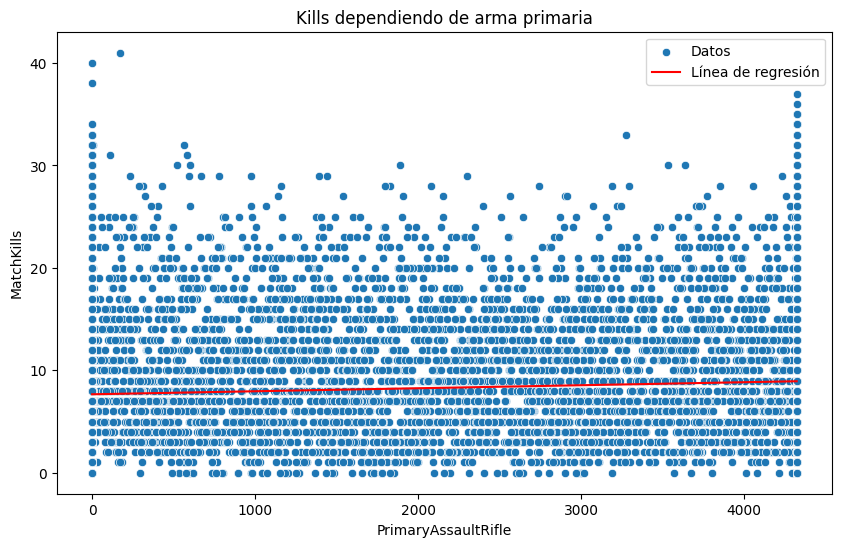

                            OLS Regression Results                            
Dep. Variable:             MatchKills   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     423.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           6.22e-94
Time:                        02:03:47   Log-Likelihood:            -2.5647e+05
No. Observations:               79157   AIC:                         5.129e+05
Df Residuals:                   79155   BIC:                         5.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.3575      0

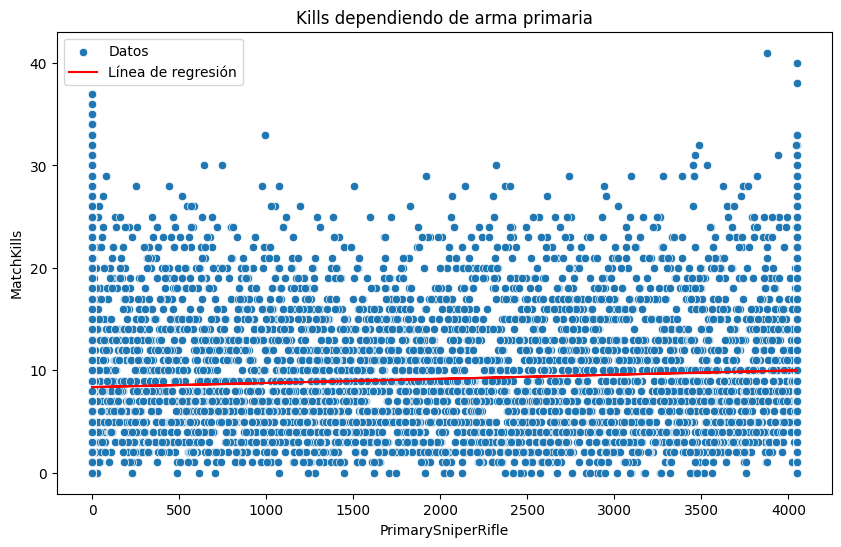

                            OLS Regression Results                            
Dep. Variable:             MatchKills   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.771
Date:                Wed, 03 Jul 2024   Prob (F-statistic):            0.00531
Time:                        02:03:49   Log-Likelihood:            -2.5668e+05
No. Observations:               79157   AIC:                         5.134e+05
Df Residuals:                   79155   BIC:                         5.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.5165      0.022    385.566   

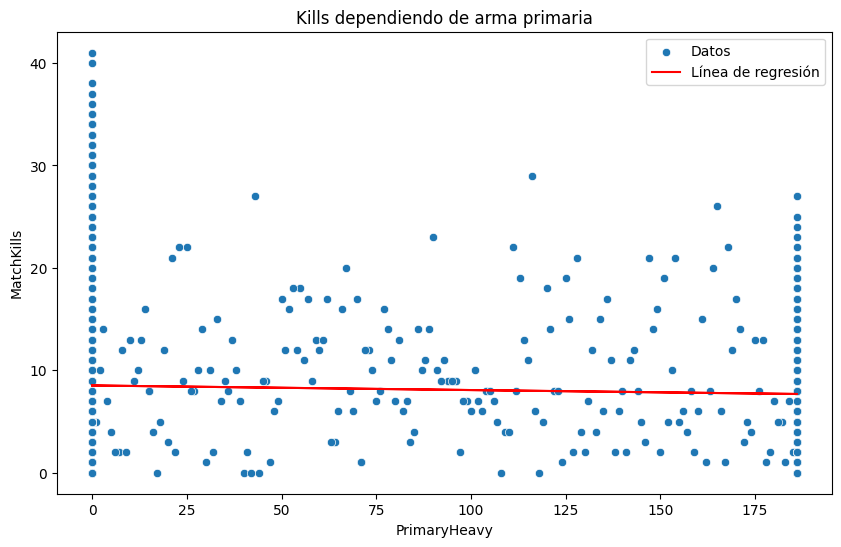

                            OLS Regression Results                            
Dep. Variable:             MatchKills   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     36.98
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.20e-09
Time:                        02:03:51   Log-Likelihood:            -2.5666e+05
No. Observations:               79157   AIC:                         5.133e+05
Df Residuals:                   79155   BIC:                         5.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5233      0.022    385.692      0.0

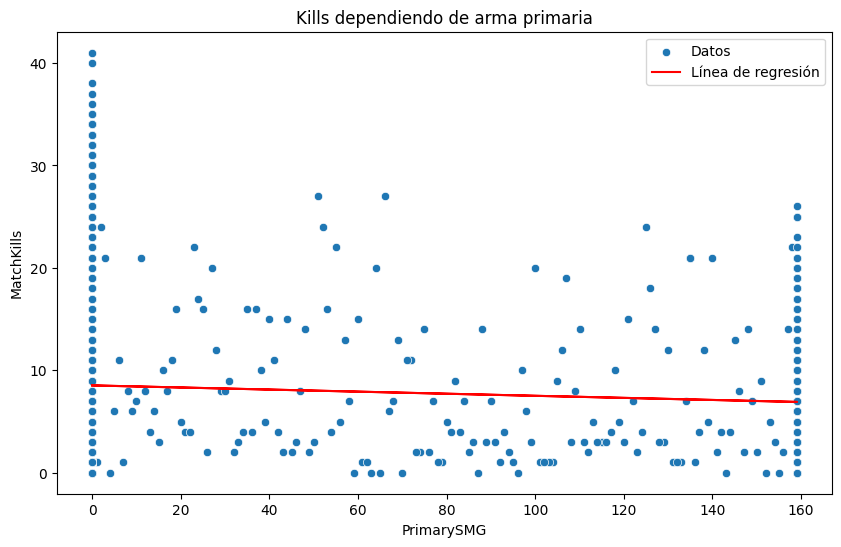

                            OLS Regression Results                            
Dep. Variable:             MatchKills   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1749.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        02:03:52   Log-Likelihood:            -2.5582e+05
No. Observations:               79157   AIC:                         5.116e+05
Df Residuals:                   79155   BIC:                         5.117e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9978      0.025    364.441

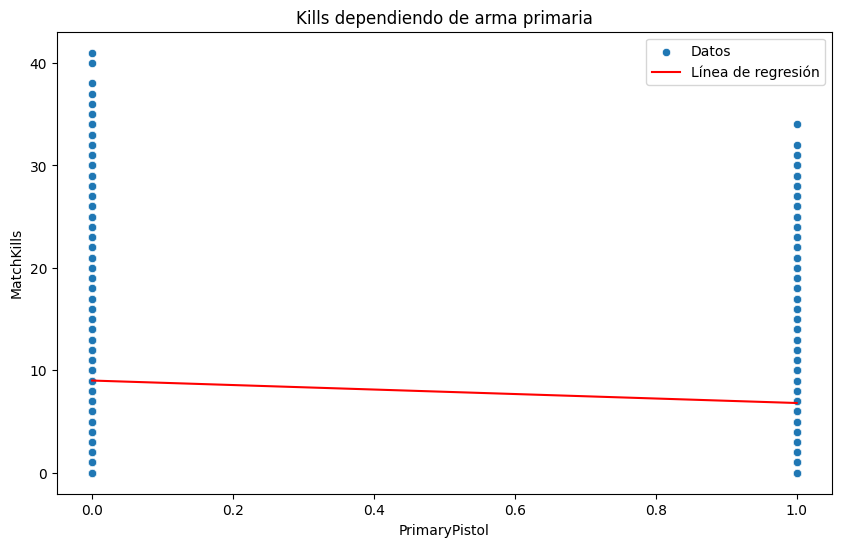

In [ ]:
variables = 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol'

for i in variables:
    # Seleccionar las columnas necesarias para el modelo de regresión
    df = df_counter[[i, 'MatchKills']]

    # Definir las variables independientes y dependientes
    X = df_counter[i]
    y = df_counter['MatchKills']

    # Añadir una constante (intercepto) al modelo
    X = sm.add_constant(X)

    # Ajustar el modelo de regresión
    model = sm.OLS(y, X).fit()

    # Imprimir el resumen del modelo
    print(model.summary())

    # Visualizar los datos y la línea de regresión
    plt.figure(figsize=(10, 6))
    sb.scatterplot(data=df, x=i, y='MatchKills', label='Datos')
    plt.plot(df[i], model.predict(X), color='red', label='Línea de regresión')
    plt.xlabel(i)
    plt.ylabel('MatchKills')
    plt.title('Kills dependiendo de arma primaria')
    plt.legend()
    plt.show()

In [ ]:
X = df_counter[['TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
            'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
            'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
            'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']]
Y = df_counter['MatchKills']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicar el preprocesamiento a los datos de entrenamiento y prueba
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba procesados
print(f"Dimensiones de X_train procesado: {X_train_processed.shape}")
print(f"Dimensiones de X_test procesado: {X_test_processed.shape}")

Dimensiones de X_train procesado: (63325, 16)
Dimensiones de X_test procesado: (15832, 16)


In [ ]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


## Fase 4: Modeling **[6 pts]**

### Regresión

In [ ]:

# Modelo 1: Regresión Lineal
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Modelo 2: Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Modelo 3: Gradient Boosting
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Evaluación del Modelo 1: Regresión Lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluación del Modelo 2: Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluación del Modelo 3: Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Regresión Lineal - MSE: {:.2f}, R2: {:.2f}".format(mse_linear, r2_linear))
print("Random Forest - MSE: {:.2f}, R2: {:.2f}".format(mse_rf, r2_rf))
print("Gradient Boosting - MSE: {:.2f}, R2: {:.2f}".format(mse_gb, r2_gb))

Regresión Lineal - MSE: 37.37, R2: 0.04
Random Forest - MSE: 33.26, R2: 0.14
Gradient Boosting - MSE: 32.78, R2: 0.15


In [ ]:
# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

predictions_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred_lr})
print(predictions_df.head(10))

       Real  Predicción
11762     3    8.874781
31836     5    9.517829
3607     15    6.912878
65769    14    9.380108
2107      8    9.758434
45050     9    8.710936
33322     4    6.380931
55085     4    9.880009
44108    16    9.253637
33483    12    8.676805


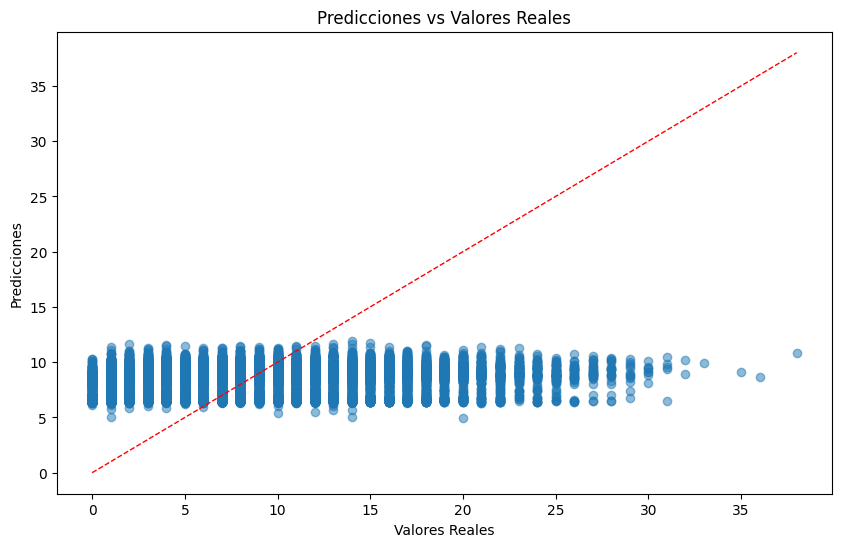

In [ ]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=1)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

### Clasificación



In [ ]:

# Codificación de variables categóricas
label_encoder = LabelEncoder()
df_counter['PrimaryAssaultRifle'] = label_encoder.fit_transform(df_counter['PrimaryAssaultRifle'])
df_counter['PrimarySniperRifle'] = label_encoder.fit_transform(df_counter['PrimarySniperRifle'])
df_counter['PrimaryHeavy'] = label_encoder.fit_transform(df_counter['PrimaryHeavy'])
df_counter['PrimarySMG'] = label_encoder.fit_transform(df_counter['PrimarySMG'])
df_counter['PrimaryPistol'] = label_encoder.fit_transform(df_counter['PrimaryPistol'])


# Modelo 1: Regresión Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Modelo 2: Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Modelo 3: Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Evaluación del Modelo 1: Regresión Logística
print("Regresión Logística")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_log))

# Evaluación del Modelo 2: Random Forest
print("Random Forest")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))

# Evaluación del Modelo 3: Gradient Boosting
print("Gradient Boosting")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_gb))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_gb))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Logística
Matriz de Confusión:
 [[ 952    0    0 ...    0    0    0]
 [1066    0    0 ...    0    0    0]
 [1035    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.06      1.00      0.11       952
           1       0.00      0.00      0.00      1066
           2       0.00      0.00      0.00      1035
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1032
           5       0.00      0.00      0.00       941
           6       0.00      0.00      0.00       944
           7       0.00      0.00      0.00       895
           8       0.00      0.00      0.00       912
           9       0.00      0.00      0.00       811
          10       0.00      0.00      0.00       738
          11       0.00      0.00      0.00       696


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Fase 5: Evaluation **[6 pts]**

                         R²       MAE        MSE      RMSE
Linear Regression  0.036025  5.053426  37.367277  6.112878
Random Forest      0.142052  4.601487  33.257283  5.766913
Gradient Boosting  0.154371  4.601177  32.779737  5.725359


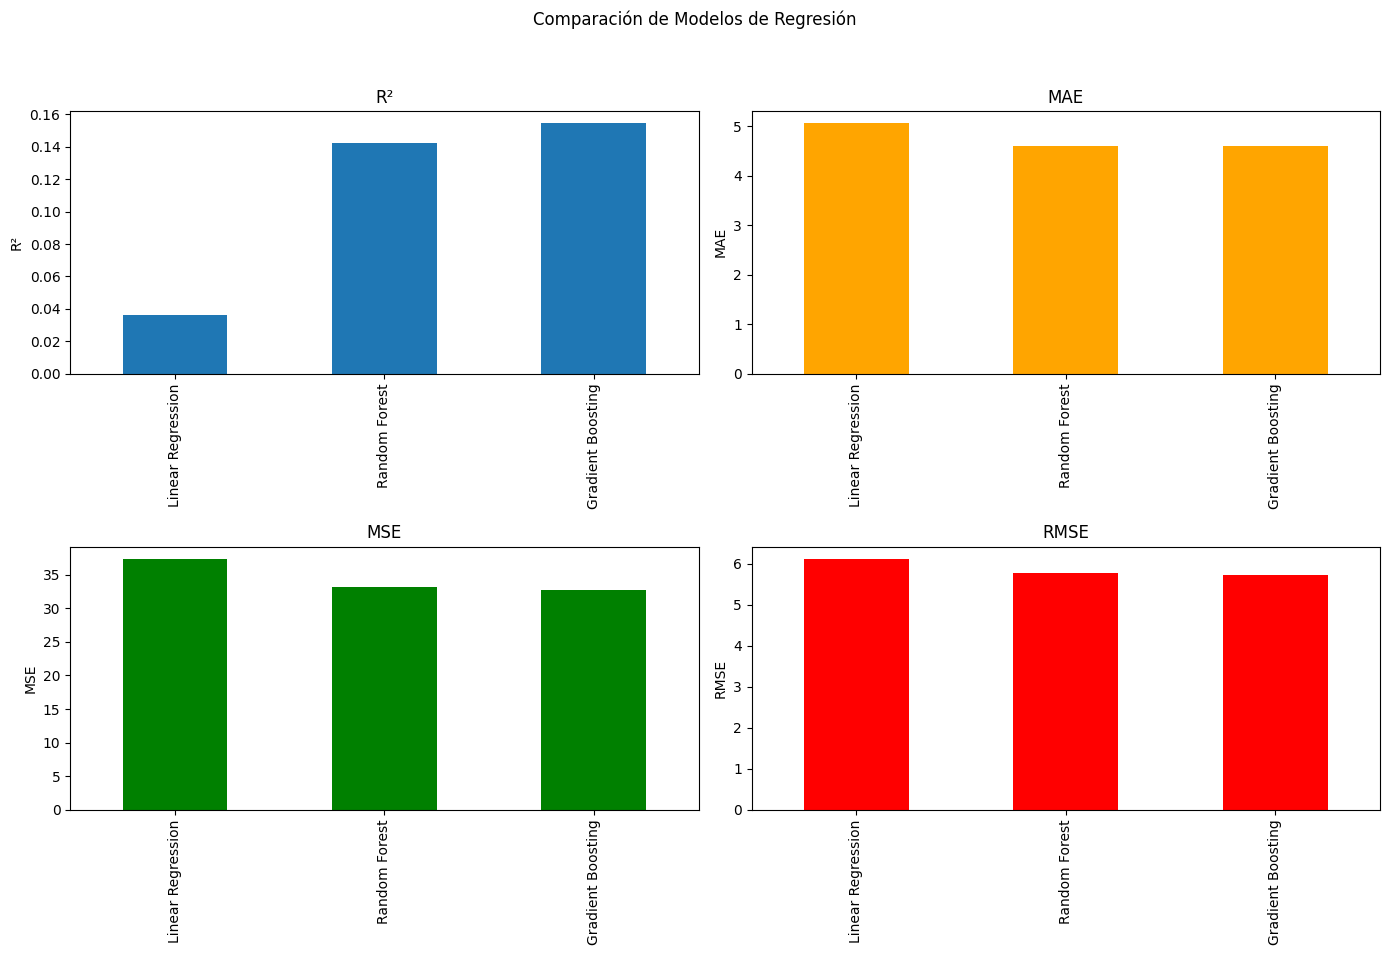

In [ ]:
# Codificación de variables categóricas
label_encoder = LabelEncoder()
df_counter['PrimaryAssaultRifle'] = label_encoder.fit_transform(df_counter['PrimaryAssaultRifle'])
df_counter['PrimarySniperRifle'] = label_encoder.fit_transform(df_counter['PrimarySniperRifle'])
df_counter['PrimaryHeavy'] = label_encoder.fit_transform(df_counter['PrimaryHeavy'])
df_counter['PrimarySMG'] = label_encoder.fit_transform(df_counter['PrimarySMG'])
df_counter['PrimaryPistol'] = label_encoder.fit_transform(df_counter['PrimaryPistol'])


# Lista de modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Evaluar cada modelo
results = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir los valores
    y_pred = model.predict(X_test)
    # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    # Guardar los resultados
    results[model_name] = {'R²': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Mostrar los resultados
results_df = pd.DataFrame(results).T
print(results_df)

# Visualización de Resultados
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparación de Modelos de Regresión')

# R²
results_df['R²'].plot(kind='bar', ax=axes[0, 0], title='R²')
axes[0, 0].set_ylabel('R²')

# MAE
results_df['MAE'].plot(kind='bar', ax=axes[0, 1], title='MAE', color='orange')
axes[0, 1].set_ylabel('MAE')

# MSE
results_df['MSE'].plot(kind='bar', ax=axes[1, 0], title='MSE', color='green')
axes[1, 0].set_ylabel('MSE')

# RMSE
results_df['RMSE'].plot(kind='bar', ax=axes[1, 1], title='RMSE', color='red')
axes[1, 1].set_ylabel('RMSE')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Gradient Boosting es el mejor modelo de los tres. Tiene el valor más alto de R², lo que significa que explica mejor los datos.
Aunque todos los modelos tienen errores similares, Gradient Boosting muestra un rendimiento mejor.
En resumen,  es el modelo más efectivo entre los tres evaluados.








## Fase 6: Deployment **[6 pts]**

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
print("Enter the following feature values:")
timeAlive = float(input("TimeAlive: "))
travelledDistance = float(input("TravelledDistance: "))
rLethalGrenadesThrown = float(input("RLethalGrenadesThrown: "))
rNonLethalGrenadesThrown = float(input("RNonLethalGrenadesThrown: "))
primaryAssaultRifle = int(input("PrimaryAssaultRifle (1 for equipped, 0 for not): "))
primarySniperRifle = int(input("PrimarySniperRifle (1 for equipped, 0 for not): "))
primaryHeavy = int(input("PrimaryHeavy (1 for equipped, 0 for not): "))
primarySMG = int(input("PrimarySMG (1 for equipped, 0 for not): "))
primaryPistol = int(input("PrimaryPistol (1 for equipped, 0 for not): "))
firstKillTime = float(input("FirstKillTime: "))
roundKills = float(input("RoundKills: "))
roundAssists = float(input("RoundAssists: "))
roundHeadshots = float(input("RoundHeadshots: "))
roundFlankKills = float(input("RoundFlankKills: "))
roundStartingEquipmentValue = float(input("RoundStartingEquipmentValue: "))
teamStartingEquipmentValue = float(input("TeamStartingEquipmentValue: "))

# Create an input array
input_features = np.array([[timeAlive, travelledDistance, rLethalGrenadesThrown, rNonLethalGrenadesThrown, primaryAssaultRifle, primarySniperRifle,
                           primaryHeavy, primarySMG, primaryPistol, firstKillTime, roundKills, roundAssists, roundHeadshots, roundFlankKills,roundStartingEquipmentValue , teamStartingEquipmentValue ]])

# Predict using the trained model
prediction = gb_reg.predict(input_features)
print(f"\nPredicted Match Kills: {prediction[0]}")

Enter the following feature values:
TimeAlive: 6713247643276342673467
TravelledDistance: 487342187342187
RLethalGrenadesThrown: 1
RNonLethalGrenadesThrown: 1
PrimaryAssaultRifle (1 for equipped, 0 for not): 1
PrimarySniperRifle (1 for equipped, 0 for not): 0
PrimaryHeavy (1 for equipped, 0 for not): 0
PrimarySMG (1 for equipped, 0 for not): 0
PrimaryPistol (1 for equipped, 0 for not): 0
FirstKillTime: 132541122
RoundKills: 2
RoundAssists: 1
RoundHeadshots: 1
RoundFlankKills: 1
RoundStartingEquipmentValue: 4000
TeamStartingEquipmentValue: 20000
Predicted Match Kills: 9.605474447177182


In [ ]:
# Predict using the trained model
prediction = gb_reg.predict(input_features)
print(f"Predicted Match Kills:: {prediction[0]}")


Predicted Match Kills:: 9.605474447177182


## Conclusiones y puntos destacados **[6 pts]**
Presentar los aspectos más importantes o puntos destacados en relación a los resultados o hallazgos encontrados durante el desarrollo del trabajo, así como recomendaciones relativas a la implementación de modelos de Machine Learning.

**Conclusiones** (Escriba a continuación sus conclusiones, puntos destacados y recomendaciones)

*